## Supervised Machine Learning: Model Training and Evaluation

### Data loading and exploratory analysis

1.	The Comma Separated Values (CSV) format data present in illness.txt file was loaded into a pandas data structure called data frame   
2.	Since, the data is column wise, it needed to be transposed to row wise representation.   
3.	Also, the columns were assigned names to ease accessing any particular column for operations in future. Finally, first few rows were displayed to check if file is loaded correctly  


In [17]:
import pandas as pd #load pandas library

#Read CSV data from 'illness.txt' into a pandas data frame and transpose it
dfMedicalTest = pd.read_csv('illness.txt', header=None).T
#Assign column names
dfMedicalTest.columns = ["plasma_glucose", "bp", "test_result", "skin_thickness", "num_pregnancies", "insulin", "bmi", "pedigree", "age"]
dfMedicalTest.head(n = 3) #display first 3 rows

#Replace string labels 'positive/ negative' with 1/0
dfMedicalTest.replace('positive', 1, inplace=True)
dfMedicalTest.replace('negative', 0, inplace=True)
dfMedicalTest.head(n = 5)

,plasma_glucose,bp,test_result,skin_thickness,num_pregnancies,insulin,bmi,pedigree,age
0,122,64,1,32,1,156,35.1,0.692,30
1,80,74,0,11,1,60,30,0.527,22
2,100,70,0,26,0,50,30.8,0.597,21
3,119,64,0,18,0,92,34.9,0.725,23
4,162,76,1,56,0,100,53.2,0.759,25


In [2]:
#Check if dataframe contains any missing value
dfMedicalTest.isnull().values.any()

False

In [2]:
dfMedicalTest.describe()

,test_result
count,376.000000
mean,0.313830
std,0.464666
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Spliting data into train/ test and validation set
First, we split data into:   
(a) training/ test data and   
(b) Validation data (to be used after training/ testing is done)   
**Note:** It is extremely important that trained model is validated with some previously held out unseen dataset, in order to evalaute the unbiased performance of the model.

In [9]:
import numpy as np
#Lock aside a 1/3rd of data (randomly sampled) for validation after training and testing the model
dfMedicalTest_train, dfMedicalTest_validate = np.split(dfMedicalTest.sample(frac=1), [int((2/3)*len(dfMedicalTest))])
X_train_data = np.array(dfMedicalTest_train.drop(["test_result"], 1)) #Store all features data for training set
y_train_target = np.array(dfMedicalTest_train["test_result"])         #Store only target class data for training set
X_validate_data = np.array(dfMedicalTest_validate.drop(["test_result"], 1)) #Store all features data for validation set
y_validate_target = np.array(dfMedicalTest_validate["test_result"])   #Store only target class data for validation set

### Training machine learning models

#### Classifier 1: K-nearest neighbours (kNN)

Nearest neighbours classifier learns about training data through induction. It simply stores the training data that it encounters and does not construct a target function beforehand. Once a new instance of data is presented, its  relationship with existing information is evaluated (often in terms of distance) and then the target function is assigned an appropriate value. In fact, such delayed processing of data is also known as lazy learning and kNN is one of the simplest exponent of this variant. Key steps for implementing simple version of kNN are:   
1. *__Training: __* This phase involves identifying class label(s) and features (attributes) which are used to predict them and simply storing them.
2. *__Parameter Selection:__* The value of parameter ‘k’ depends upon data to be classified. Generally, it is an odd number for binary classification problems in order to avoid conflicts in case of neighbours majority vote. Also, it is observed that higher the value of k (limited range), lesser tends to be the effect of noise on the model.
3.	*__Classification:__* A distance metric such as Euclidean distance is used to calculate proximity of test query with training data. Since, different features have different measures, it is better to normalize all of them to same scale in order to avoid one feature dominating distance metrics. A vote of k nearest neighbour is obtained and value of test class label is decided by the class value of majority of neighbours.   
Type of distance metrics:   
i. Manhattan distance   
ii. Euclidean distance   
iii. Hamming distance   
iv. Cosine distance   
Presenting unseen test instance to 9-NN classification model trained with 350 instances of illness data:   
<img src="images/kNN.png">

*Scenarios where k-Nearest Neighbours classifier could be used:*   
•	When there are large number of instances available to learn and decision boundaries can get irregular
•	Dimensions in data are limited to a small or moderate number (ideally < 20)

**Applications:**   
Highly successful in classifying handwritten digits, satellite image scenes and heart EKG patterns

#### Classifier 2: Logistic Regression

   Logistic Regression is one of the important statistical modelling techniques used to describe relationship between one or more independent variables (predictors/ explanatory variables) and one or more discrete valued output (dependent/ response) variables. The binomial (binary) logistic regression technique suits well our task of modelling a classifier with illness data for predicting whether the test results would be positive or negative (0 or 1).
 This classifier tries to build a hypothesis function to try to predict probability (or specifically odds) of a particular instance belonging to class 1 (positive/ true/ yes and so on) and not belonging to class 0 (negative/ false/ no, etc.).   
 
 <img src="images/LR1.png">
 
 Since, we are not dealing with continuous outcomes, using hypothesis function similar to linear regression produces non-useful results. Also, the value of P(1|x) is observed to change gradually with change in x. In such a case, a logistic (also known as sigmoid) function instead of a linear function perfectly represents the relationship between hypothesis and expected value. Thus, hypothesis function can be formulated as:   
<img src="images/LR2.png">    
<img src="images/LR3.png">   
<img src="images/LR4.png">      

### Model Construction & Evaluation
 - We use kNN and LogisticRegression implementations from Python scikit Learn package
 - 10-fold stratified cross validation is used so that each fold has similar distribution of +ve/ -ve classes as in complete data.    
 <img src="images/testdata.PNG">

In [11]:
from sklearn import neighbors, linear_model #Contains class definitions for k-Nearest neighbours and Logistic Regression
from sklearn.model_selection import StratifiedKFold #to perform stratified 10 fold cross-validation
import matplotlib.pyplot as plt   #to plot ROC curves
from sklearn.metrics import confusion_matrix #to construct confusion matrix after training/ testing models

skFold_scores_Logistic = []; skFold_scores_kNN = []  #to store accuracy scores across 10 folds and calculate their mean
stratified_k_folds = StratifiedKFold(10, random_state=0) #Create 10 stratified folds

LogisticClassifier = linear_model.LogisticRegression()  
kNNclassifier = neighbors.KNeighborsClassifier(n_neighbors=9) #set number of nearest neighbours to 9
#iterate over 10 folds while fitting the models
for train_index, test_index in stratified_k_folds.split(X_train_data,y_train_target):
    kNNclassifier.fit(X_train_data[train_index], y_train_target[train_index]) #train kNN classifer model
    skFold_scores_kNN.append(kNNclassifier.score(X_train_data[test_index], y_train_target[test_index])) #store accuracies
    
for train_index, test_index in stratified_k_folds.split(X_train_data,y_train_target):
    LogisticClassifier.fit(X_train_data[train_index], y_train_target[train_index]) #train Logistic Regression model
    skFold_scores_Logistic.append(LogisticClassifier.score(X_train_data[test_index], y_train_target[test_index]))

#Unlock validation dataset and test our models' prediction on unseen instances
y_validate_predicted_Logistic = LogisticClassifier.predict(X_validate_data)
y_validate_predicted_kNN = kNNclassifier.predict(X_validate_data)

#Construct confusion matrix by comparing actual target values with respective predicted values
confusion_matrix_kNN = confusion_matrix(y_validate_target, y_validate_predicted_kNN)
confusion_matrix_Logistic = confusion_matrix(y_validate_target, y_validate_predicted_Logistic)
#get true positive, false positive, false negative & true negative values from confusion matrix
tp_kNN, fp_kNN, fn_kNN, tn_kNN = confusion_matrix_kNN.ravel()
tp_Logistic, fp_Logistic, fn_Logistic, tn_Logistic = confusion_matrix_Logistic.ravel()


Accuracy over Stratified 10-fold validation:
1. k Nearest Neighbours =  0.768076923077 
2. Logistic Regression =  0.747935897436 

--------------------------------------------------------
Confusion Matrix, Sensitivity (Recall) and Specificity: 
--------------------------------------------------------
1. k Nearest Neighbours
 [[75  6]
 [27 18]] 	Sensitivity =  0.735294117647 	Specificity =  0.75 

2. Logistic Regression
 [[75  6]
 [26 19]] 	Sensitivity =  0.742574257426 	Specificity =  0.76


### Model Performance Evaluation

Confusion matrix, True positive rate, False positive rate, Sensitivity, Specificity and ROC curves are used to evaluate the performance of two models. 
#### Accuracy, Confusion matrix, Specificity and Sensitivity:

In [20]:
#Print metrics for kNN and Logistic Regression Classifers
print("Accuracy over Stratified 10-fold validation:\n1. k Nearest Neighbours = ", \
      np.mean(np.abs(skFold_scores_kNN)),"\n2. Logistic Regression = ", \
      np.mean(np.abs(skFold_scores_Logistic)), \
      "\n\n--------------------------------------------------------\nConfusion Matrix, \
      Sensitivity (Recall) and Specificity: \n---------------------------------------------------\
      -----\n1. k Nearest Neighbours\n", confusion_matrix_kNN,"\n\n2. Logistic Regression\n", \
      confusion_matrix_Logistic, "\tSensitivity = ",tp_Logistic/(tp_Logistic + fn_Logistic),\
      "\tSpecificity = ",tn_Logistic/(tn_Logistic + fp_Logistic))


Accuracy over Stratified 10-fold validation:
1. k Nearest Neighbours =  0.768076923077 
2. Logistic Regression =  0.747935897436 

--------------------------------------------------------
Confusion Matrix, Sensitivity (Recall) and Specificity: 
--------------------------------------------------------
1. k Nearest Neighbours
 [[75  6]
 [27 18]] 

2. Logistic Regression
 [[75  6]
 [26 19]] 	Sensitivity =  0.742574257426 	Specificity =  0.76


#### ROC Curves

 - **Calculate Probability Estimates:** ROC curves are plotted using true positive and false positive rates which require comparing probabilities of predicting positive value with actual target value. Hence, probability estimates of predictions are calculated for both models using the previously held out test dataset.
 - **Compute TPR, FPR, Thresholds:** ‘roc_curve’ function computes the false positive rates, true positive rates and threshold values for binary classifiers. The increasing FPR and TPR values are calculated with decreasing threshold values on decision function. ROC Curves are a measure of trade-off between Sensitivity and Specificity typically for a binary classifier   
 <img src="images/Rates.png">      
- TPR and FPR are calculated at various threshold values starting from highest threshold to lowest. If the classifier score is greater than a threshold value, a positive label value is predicted; and if actual value is positive, it is considered as TP else FP. For increase in TPR, ROC curve moves along Y-axis and with increase in FPR, along X-axis. For e.g. consider 5 instances of test data with threshold value of 0.52. Here is the plot:   
 <img src="images/Calculation.png">    
 - **Area Under Curve (AUC):** Area under Sensitivity vs. Fallout curve denotes the probability that the machine learning classification model will predict a random instance as positive than negative. It is also known as C-Score. In scikit-learn library, it can be calculated using ‘metrics.auc’ function which essentially computes it using trapezoidal rule.
 - **Plot ROC Curve:** Plotted ROC curve using Matplotlib library and setting Y-axis as Sensitivity (Recall/ True Positive Rate) and X-axis as 1 - Specificity (Fall out rate/ False positive rate). 
 

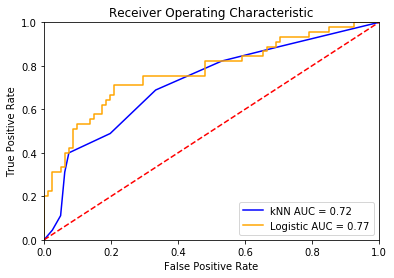

In [16]:
from sklearn import metrics
#Predict probability estimates of the positive class on held out data using kNN classifier
predictions_kNN = kNNclassifier.predict_proba(X_validate_data)[:,1]
#Compute false positive, true positive rates, threshold values with actual label values and predicted probabilites
fpr_kNN, tpr_kNN, threshold_kNN = metrics.roc_curve(y_validate_target, predictions_kNN)
#Compute value of Area Under Curve for kNN classifier
roc_auc_kNN = metrics.auc(fpr_kNN, tpr_kNN)

#Predict probability estimates of the positive class on held out data using Logistic Regression classifier
predictions_LR = LogisticClassifier.predict_proba(X_validate_data)[:,1]
#Compute false positive, true positive rates, threshold values with actual label values and predicted probabilites
fpr_LR, tpr_LR, threshold_LR = metrics.roc_curve(y_validate_target, predictions_LR)
#Compute value of Area Under Curve for Logistic Regression classifier
roc_auc_LR = metrics.auc(fpr_LR, tpr_LR)

#Plot ROC curves for kNN and Logistic Regression classifiers using respective tpr and fpr
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_kNN, tpr_kNN, 'b', label = 'kNN AUC = %0.2f' % roc_auc_kNN)
plt.plot(fpr_LR, tpr_LR, 'b', label = 'Logistic AUC = %0.2f' % roc_auc_LR, color='orange')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') #Plot diagonal
#Fit plot exactly between [0, 0] and [1, 1]
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Observations

**Based on ROC curves:**   
Some of the significant observations that can be made from above ROC curves are:
1.	**__Better than random classifier: __**

      The points on diagonal represent predictions by a random guessing classifier. The diagonal segregates the ROC space into regions with prediction better and worse than random guessing. The points lying above this ‘line of no-discrimination’ are considered to be better classifiers due to low FPR and high TPR. In our case, ROC curves of both the classifiers are much in the top region which points towards better than random guess.

2.	**__Logistic Regression Classifier performed better than kNN Classifier (higher AUC):__** 

      It is seen from the graph that, higher the number of points in top left corner, higher is the TPR (Sensitivity) and lower is the FPR (higher Specificity). So, a curve passing through these points would have a higher area under it. Higher Area Under Curve (AUC) denotes that a model correctly predicts a positive instance with high confidence (assigns high probability to true positive cases). In our case, we see that AUC for Logistic Regression classifier (0.82) is higher than that for kNN (0.76). Considering that ideal classifier has AUC = 1, and Logistic regression ROC curve seems to be dominating towards 1 and thus is better when tested with this randomly sampled 1/3rd of dataset (validation set). Result is likely to vary with different random set.

3.	**__Determination of Optimal Cut-off value (Threshold):__**

The purpose of training classifiers over illness dataset is to predict where medical test results are positive or negative. Hence, it becomes imperative that we have high Sensitivity as well as Specificity. i.e. less number of false negatives and high number of true positives is much desired. As we see in the graph alongside, threshold values of classifiers at points shown yield highest specificity as well as sensitivity. These points are nearest to (1, 1) i.e. highest specificity as well as sensitivity and are most likely to correctly predict true positives.   
   
<img src="images/Threshold.png">      

4.	**__Trade-off between Sensitivity and Specificity:__**

In case of our graphs, we see curve for Logistic Regression grazing top axis and thus better at predicting true positives and less false negatives (better sensitivity than specificity). Generally, in situations where high sensitivity (more true positives) is desired over specificity, we seek ROC curve skewed more nearer to top axis and in cases where low false positives (high specificity) are required, a skew towards left axis is preferred. In case of medical test like this, false negatives can be fatal and thus high recall is desirous.

#### Comparing kNN and Logistic regression performances
Comparing model performances on the basis of following criteria:

1.	**__Misclassification Error:__** Both the classifiers with current selection of parameters perform almost similarly on accuracy metric. Std. Dev. suggests low variance in findings
2.	**__Confusion matrix:__** Since, the models predict medical test results, sensitivity (recall) and specificity are more relevant measures than accuracy as low sensitivity would mean less true positives and more false negatives which could have adverse consequences for the patients. Logistic regression performs slightly better here.
3.	**__Logarithmic Loss:__** Logistic regression reports a better log-loss value suggesting high confidence in correctly classifying positive cases whereas kNN appears more confident in incorrectly classifying them. 

